In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("display.precision", 2)
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv(filepath_or_buffer='balance.csv', low_memory=False)

In [8]:
df.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,BOPQ.S06AC000000000A,1971.06,426.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
1,BOPQ.S06AC000000000A,1971.09,435.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
2,BOPQ.S06AC000000000A,1971.12,360.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
3,BOPQ.S06AC000000000A,1972.03,417.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual
4,BOPQ.S06AC000000000A,1972.06,528.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Actual


In [9]:
df.shape

(183931, 10)

In [10]:
df.columns

Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'MAGNTUDE', 'Subject', 'Group', 'Series_title_1'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183931 entries, 0 to 183930
Data columns (total 10 columns):
Series_reference    183931 non-null object
Period              183931 non-null float64
Data_value          156886 non-null float64
Suppressed          80 non-null object
STATUS              183931 non-null object
UNITS               183931 non-null object
MAGNTUDE            183931 non-null int64
Subject             183931 non-null object
Group               183931 non-null object
Series_title_1      183931 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 14.0+ MB


In [13]:
# change the column type
# df['Series_title_1'] = df['Series_title_1'].astype('object')

In [14]:
df.describe()

,Period,Data_value,MAGNTUDE
count,183931.00,156886.00,183931.00
mean,2006.14,5608.07,5.97
std,11.48,32325.85,0.40
min,1971.06,-180284.00,0.00
25%,2002.03,0.00,6.00
50%,2008.09,2.00,6.00
75%,2015.03,805.00,6.00
max,2020.12,494723.00,6.00


In [18]:
df.describe(include=['float64'])

,Period,Data_value
count,183931.00,156886.00
mean,2006.14,5608.07
std,11.48,32325.85
min,1971.06,-180284.00
25%,2002.03,0.00
50%,2008.09,2.00
75%,2015.03,805.00
max,2020.12,494723.00


In [21]:
df['STATUS'].value_counts()

F    167159
C     14821
R      1951
Name: STATUS, dtype: int64

In [22]:
df.sort_values(by='STATUS', ascending=False).head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
62518,BOPA.S06AC000000000E,2011.03,21828.0,NaN,R,Dollars,6,Balance of Payments - BOP,"BPM6 Annual, Balance of payments major components",Actual
138025,IIPA.S06AA000000001A,2017.03,121851.0,NaN,R,Dollars,6,International Investment Position - IIP,"BPM6 Annual, External lending and debt all sec...",Actual
91584,BOPA.S06AD10000000C4,2011.03,25280.0,NaN,R,Dollars,6,Balance of Payments - BOP,"BPM6 Annual, Balance of payments major components",Actual
91585,BOPA.S06AD10000000C4,2012.03,-12546.0,NaN,R,Dollars,6,Balance of Payments - BOP,"BPM6 Annual, Balance of payments major components",Actual
138027,IIPA.S06AA000000001A,2019.03,132875.0,NaN,R,Dollars,6,International Investment Position - IIP,"BPM6 Annual, External lending and debt all sec...",Actual


In [23]:
df.sort_values(by=['STATUS', 'Period'],
        ascending=[True, False]).head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
1675,BOPQ.S06AC0000000C44,2020.12,NaN,NaN,C,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual
1841,BOPQ.S06AC0000000C46,2020.12,NaN,NaN,C,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual
3666,BOPQ.S06AC00000C211D,2020.12,NaN,NaN,C,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual
3832,BOPQ.S06AC00000C211O,2020.12,NaN,NaN,C,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual
5160,BOPQ.S06AC00000C444O,2020.12,NaN,NaN,C,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments financial ...",Actual


In [25]:
df['STATUS'].unique()

array(['F', 'R', 'C'], dtype=object)

In [26]:
df['Data_value'].mean()

5608.071246637686

In [30]:
df[df['STATUS'] == 'R'].mean()

Period         2017.22
Data_value    30957.75
MAGNTUDE          5.98
dtype: float64

In [51]:
toy_df = pd.DataFrame({'name': ['Alice', 'Greg', 'Rob'], 'age': [17, 32, 56], 'salary': [56, 59, 45], 'gender': ['F', 'M', 'M']})

In [52]:
toy_df.head()

,name,age,salary,gender
0,Alice,17,56,F
1,Greg,32,59,M
2,Rob,56,45,M


In [53]:
toy_df[(toy_df['salary'] > 50) & (toy_df['age'] > 18)]

,name,age,salary,gender
1,Greg,32,59,M


In [54]:
toy_df['gender'] = toy_df['gender'].apply(lambda g : 'female' if g == 'F' else 'male')

In [55]:
toy_df.head()

,name,age,salary,gender
0,Alice,17,56,female
1,Greg,32,59,male
2,Rob,56,45,male


### map

In [56]:
toy_df['gender'] = toy_df['gender'].map({'female': 'F', 'male': 'M'})

In [58]:
toy_df

,name,age,salary,gender
0,Alice,17,56,F
1,Greg,32,59,M
2,Rob,56,45,M


### loc

In [60]:
# The loc method is used for indexing by name, while iloc() is used for indexing by number.
toy_df.loc[0:1, 'name':'age']

,name,age
0,Alice,17
1,Greg,32


In [62]:
toy_df.iloc[0:2, 2:4]

,salary,gender
0,56,F
1,59,M


In [63]:
toy_df[-1:]

,name,age,salary,gender
2,Rob,56,45,M


In [75]:
df = df.replace({'Series_title_1': {'Actual': 'Act'}})
df.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,BOPQ.S06AC000000000A,1971.06,426.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Act
1,BOPQ.S06AC000000000A,1971.09,435.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Act
2,BOPQ.S06AC000000000A,1971.12,360.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Act
3,BOPQ.S06AC000000000A,1972.03,417.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Act
4,BOPQ.S06AC000000000A,1972.06,528.0,NaN,F,Dollars,6,Balance of Payments - BOP,"BPM6 Quarterly, Balance of payments major comp...",Act


In [83]:
columns_to_show = ['Data_value']
df.groupby(['Period'])[columns_to_show].agg([np.mean, np.std, np.min, np.max]).iloc[0:10]

Data_value                       
              mean     std   amin    amax
Period                                   
1971.06      59.27  110.31  -44.0   426.0
1971.09      61.20  116.88  -46.0   438.0
1971.12      52.08  102.51  -48.0   408.0
1972.03     134.63  320.45 -169.0  1649.0
1972.06      89.59  192.14 -175.0  1392.0
1972.09      86.00  189.03 -176.0  1414.0
1972.12      83.49  199.58 -179.0  1480.0
1973.03     176.30  388.16 -171.0  2043.0
1973.06     116.65  237.32 -183.0  1758.0
1973.09     106.27  246.80 -209.0  1843.0

In [86]:
pd.crosstab(df['Period'], df['Data_value'], normalize=True).iloc[0:8]

Data_value,-180284.0,-179336.0,-177197.0,-177100.0,-172181.0,-171174.0,-169391.0,-167453.0,-164291.0,-164210.0,...,430983.0,439206.0,449002.0,462363.0,468255.0,475996.0,481041.0,482638.0,489770.0,494723.0
Period,,,,,,,,,,,,,,,,,,,,,
1971.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df.pivot_table(['Data_value'], ['Period'], aggfunc='mean')

,Data_value
Period,
1971.06,59.27
1971.09,61.20
1971.12,52.08
1972.03,134.63
1972.06,89.59
...,...
2019.12,18082.18
2020.03,7260.76
2020.06,19370.77


In [92]:
df.drop(['Group', 'Series_title_1'], axis=1, inplace=True)

In [93]:
df.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,MAGNTUDE,Subject
0,BOPQ.S06AC000000000A,1971.06,426.0,NaN,F,Dollars,6,Balance of Payments - BOP
1,BOPQ.S06AC000000000A,1971.09,435.0,NaN,F,Dollars,6,Balance of Payments - BOP
2,BOPQ.S06AC000000000A,1971.12,360.0,NaN,F,Dollars,6,Balance of Payments - BOP
3,BOPQ.S06AC000000000A,1972.03,417.0,NaN,F,Dollars,6,Balance of Payments - BOP
4,BOPQ.S06AC000000000A,1972.06,528.0,NaN,F,Dollars,6,Balance of Payments - BOP


In [95]:
pd.crosstab(df['STATUS'], df['Period'], margins=True)

Period,1971.06,1971.09,1971.12,1972.03,1972.06,1972.09,1972.12,1973.03,1973.06,1973.09,...,2018.12,2019.03,2019.06,2019.09,2019.12,2020.03,2020.06,2020.09,2020.12,All
STATUS,,,,,,,,,,,,,,,,,,,,,
C,1,1,1,1,1,1,1,1,1,1,...,45,790,50,45,48,837,69,65,59,14821
F,239,240,240,370,241,241,241,370,241,241,...,753,4192,748,753,749,4596,703,341,739,167159
R,0,0,0,0,0,0,0,0,0,0,...,0,451,0,0,1,0,26,392,0,1951
All,240,241,241,371,242,242,242,371,242,242,...,798,5433,798,798,798,5433,798,798,798,183931


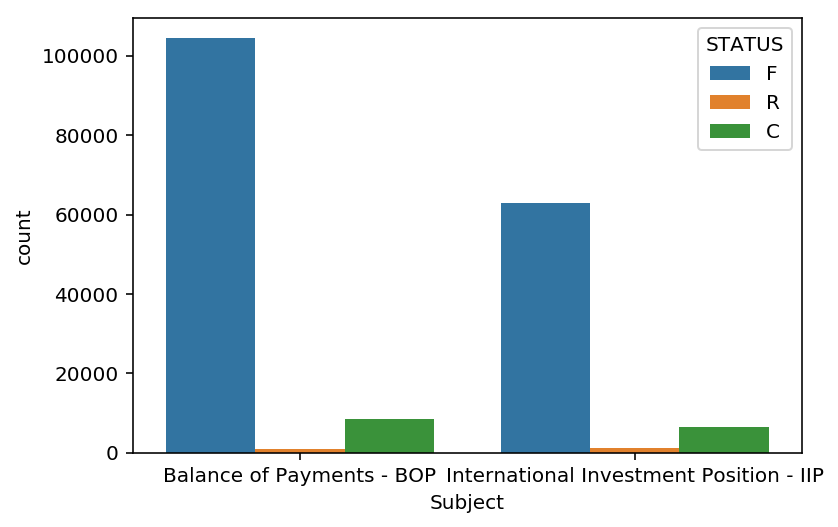

In [98]:
sns.countplot(x='Subject', hue='STATUS', data=df);

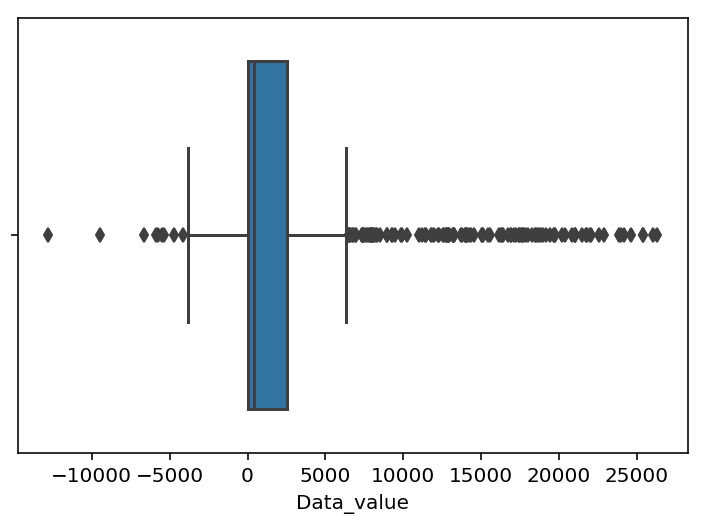

In [103]:
sns.boxplot(x='Data_value', data=df.iloc[0:1000])